## 자연어 처리 기초

### 형태소 분석기
- konlpy : 한국어 처리를 위한 형태소 분석기
- 형태소 : 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위

In [1]:
# 라이브러리 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# konlpy 설치
!pip install konlpy

In [3]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [4]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [5]:
# 토큰화 (명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [6]:
# 토큰화 (품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

### CountVectorizer 

In [7]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)

In [9]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [10]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [11]:
# 단어 사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [12]:
# 단어 사전 크기
len(vect.vocabulary_)

7

In [13]:
# 인코딩
df_t = vect.transform(words)

In [14]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [15]:
# 어휘와 피처 (데이터 프레임)
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [16]:
# test
test = 'AI 공부하며 함께 성장해요!'

In [17]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [18]:
# 인코딩된 데이터 Matrix
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [19]:
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


### TfidfVectorizer 

In [20]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# tf-idf 활용 어휘 사전 구축
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [22]:
# 인코딩된 데이터 Matrix
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [23]:
pd.DataFrame(vect.transform(words).toarray(), columns=vect.get_feature_names())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 감성분석

In [24]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

### EDA 및 데이터 전처리

In [25]:
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [26]:
# 데이터 크기
df.shape

(150000, 3)

In [27]:
# 타켓 확인
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [28]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [29]:
# 결측치 삭제
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(150000, 3)
(149995, 3)


In [30]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<AxesSubplot:ylabel='Frequency'>

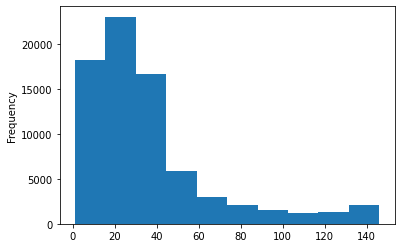

In [31]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df.label == 0]['len'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

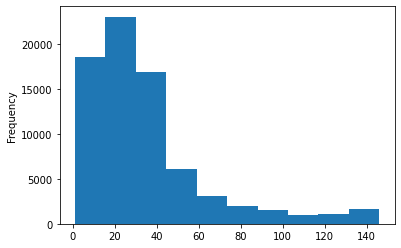

In [32]:
# len 시각화 (label == 1)
import matplotlib.pyplot as plt
df[df.label == 1]['len'].plot(kind='hist')

In [33]:
# 데이터 샘플링 df[:1000]
df = df[:1000]
df.shape

(1000, 4)

In [34]:
# 토큰화
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

### 머신러닝

In [35]:
# 머신러닝 -> 교차검증(f1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6634352457852256

## 자연어 전처리
### 어휘 사전 구축

In [36]:
# 토큰화(max_df) 0% 이상 나타나는 단어 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df=10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.643

In [37]:
# 토큰화(min_df) 최소 0개의 문장에만 나타나는 단어만 유지
vect = CountVectorizer(tokenizer = tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.689

### 불용어(stopword)

In [38]:
# stop_words
text = '함께 탐험하며 성장하는 AI 학교 AIFFEL'
stop_words = ['하며','ai']
vect = CountVectorizer(stop_words = stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

### 띄어쓰기
- 더 자세히 : https://github.com/haven-jeon/PyKoSpacing

In [39]:
# Spacing 설치
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-9s9abc64
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-9s9abc64
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 490.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 49.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 39.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [41]:
# 띄어쓰기
from pykospacing import Spacing
spacing = Spacing()
text = '함께탐험하며성장하는AI학교AIFFEL'
spacing(text)

'함께 탐험하며 성장하는 AI 학교 AIFFEL'

### 반복되는 글자 정리
- 더 자세히 : https://github.com/lovit/soynlp

In [42]:
# soynlp 설치
!pip install soynlp

In [43]:
# 댓글 데이터에 등장하는 반복되는 이모티콘의 정리
from soynlp.normalizer import *
emoticon_normalize('하하하하하ㅋㅋㅋㅋㅋㅋ호호호호호ㅠㅠㅠㅠㅠㅠ', num_repeats=3)

'하하하ㅋㅋㅋ호호호ㅠㅠㅠ'

### 맞춤법 검사기
- 더 자세히 : https://github.com/jungin500/py-hanspell

In [60]:
!pip install git+https://github.com/jungin500/py-hanspell

  Cloning https://github.com/jungin500/py-hanspell to /tmp/pip-req-build-nonw4ca4
  Running command git clone --filter=blob:none --quiet https://github.com/jungin500/py-hanspell /tmp/pip-req-build-nonw4ca4
  Resolved https://github.com/jungin500/py-hanspell to commit 9cf4ce38a8d259b92dc8af3f35d7c2442e130180
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4845 sha256=268f5c6f5ecf7ad70b11442f8151fea734abb6451de2ccd18f666c125ae8b7bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-a59qv1f8/wheels/65/95/29/5081934e2418613c2e986f8f0d7c55071a85d436f4367deeb2
Successfully built py-hanspell


In [61]:
# 맞춤법 검사
from hanspell import spell_checker
text = '알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소.학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고 있는 모두의 연구소에서 만들어졌습니다'

In [62]:
# 수정된 문장
result = spell_checker.check(text)

KeyError: 'result'

## 종합 퀴즈

In [63]:
# Q. 다음은 영화 리뷰 데이터를 전처리하고 머신러닝 모델을 돌리는 코드입니다.
# 아래 코드를 수정하여 토큰화(max_df) 10,15,20개보다 큰 단어 수 무시하기를 각각 설정하고, 
# 바로 아래 코드 블럭의 모델을 돌려 결과 값을 비교해보세요.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import konlpy
from konlpy.tag import Okt

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
# 결측치 삭제
df = df.dropna()
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
# 데이터 샘플링
df = df[:1000]
# 토큰화
nums = [10,15,20]
vec_dict = {}
for n in nums:
    tokenizer = Okt()
    vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=n)
    vectors = vect.fit_transform(df['document'])
    vec_dict[n] = vectors

In [66]:
# 머신러닝 모델 작동 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

results = {}
model = RandomForestClassifier(random_state=2022)
for n in nums:
    result = cross_val_score(model, vec_dict[n], df['label'], scoring='f1', cv=5).mean()
    results[n] = result

In [67]:
# Q. 결과값을 비교해 보세요. 
print(results)

{10: 0.6300776326538058, 15: 0.6397803806582216, 20: 0.6817517114020853}
